In [1]:
import numpy as np
import json
import pycpd
from matplotlib import pyplot as plt

In [2]:
with open('Annotationen/Annotation-D.json') as f:
    data = json.load(f)

# für Schnitte C und D sind die json Dateien richtig (Regionsbenennung 'name'='Other')
# TODO E, F, G, H Json richtig darstellen
    
for item in data:
    if 'classification' in item['properties']:
        if item['properties']['classification']['name'] == 'Other':
            annotation_c_list = []
            for sublist in item['geometry']['coordinates']:
                for sublist2 in sublist:
                    for point in sublist2:
                        annotation_c_list.append(point)
                        print(point)
            annotation_c = np.array(annotation_c_list)
            
            

[45826.32, 1247.17]
[45275.25, 1276.18]
[44869.19, 1334.18]
[44405.13, 1363.19]
[44347.12, 1421.2]
[44028.07, 1450.2]
[43767.04, 1508.21]
[43447.99, 1537.21]
[43389.98, 1595.22]
[43186.96, 1624.22]
[43041.93, 1682.23]
[42793.67, 1701.33]
[42793, 1702]
[42784, 1705]
[42745.98, 1705]
[42664.88, 1711.24]
[42432.85, 1769.24]
[42294.97, 1783.03]
[42287, 1791]
[42284, 1793]
[42281, 1794]
[42249, 1794]
[42225, 1794]
[42198, 1821]
[42192, 1823]
[42189, 1824]
[42166, 1824]
[42140, 1849]
[42138, 1851]
[42135, 1852]
[42133, 1853]
[42106, 1853]
[42081, 1879]
[42079, 1881]
[42073, 1883]
[42047, 1883]
[42021, 1908]
[42019, 1910]
[42016, 1912]
[42014, 1913]
[41987, 1913]
[41980.84, 1919.16]
[41968.79, 1943.27]
[41938.64, 1961.36]
[41900, 2000]
[41897, 2001]
[41895, 2002]
[41870.9, 2002]
[41863.64, 2006.36]
[41811, 2059]
[41805, 2061]
[41803, 2062]
[41749, 2062]
[41722, 2089]
[41716, 2091]
[41686, 2091]
[41600, 2091]
[41575, 2117]
[41573, 2119]
[41567, 2121]
[41508, 2121]
[41446.05, 2121]
[41384.28, 2

[40429, 56036]
[40406, 56059]
[40406, 56063]
[40405, 56064]
[40405, 56065]
[40401, 56069]
[40401, 56083]
[40400, 56084]
[40400, 56085]
[40396, 56089]
[40396, 56113]
[40395, 56114]
[40395, 56115]
[40394, 56115]
[40393, 56116]
[40358, 56116]
[40358, 56115]
[40356, 56115]
[40352, 56111]
[40348, 56111]
[40348, 56110]
[40346, 56110]
[40346, 56099]
[40341, 56095]
[40341, 56074]
[40336, 56070]
[40336, 56064]
[40322, 56051]
[40318, 56051]
[40318, 56050]
[40316, 56050]
[40312, 56046]
[40304, 56046]
[40300, 56050]
[40299, 56050]
[40298, 56051]
[40289, 56051]
[40285, 56055]
[40284, 56055]
[40283, 56056]
[40253, 56056]
[40253, 56055]
[40251, 56055]
[40247, 56051]
[40243, 56051]
[40243, 56050]
[40241, 56050]
[40236, 56045]
[40236, 56039]
[40231, 56035]
[40231, 56024]
[40226, 56020]
[40226, 56014]
[40221, 56010]
[40221, 55994]
[40216, 55990]
[40216, 55979]
[40211, 55975]
[40211, 55954]
[40207, 55951]
[40203, 55951]
[40203, 55950]
[40201, 55950]
[40196, 55945]
[40196, 55851]
[40202, 55851]
[40206, 55

[44902, 56310]
[44911, 56319]
[44911, 56321]
[44912, 56321]
[44912, 56325]
[44921, 56334]
[44921, 56336]
[44922, 56336]
[44922, 56341]
[44921, 56342]
[44921, 56343]
[44911, 56353]
[44910, 56353]
[44909, 56354]
[44905, 56354]
[44891, 56368]
[44890, 56368]
[44889, 56369]
[44885, 56369]
[44876, 56378]
[44875, 56378]
[44874, 56379]
[44870, 56379]
[44861, 56388]
[44860, 56388]
[44859, 56389]
[44855, 56389]
[44851, 56393]
[44850, 56393]
[44849, 56394]
[44845, 56394]
[44841, 56398]
[44840, 56398]
[44839, 56399]
[44835, 56399]
[44831, 56403]
[44830, 56403]
[44829, 56404]
[44825, 56404]
[44821, 56408]
[44820, 56408]
[44819, 56409]
[44810, 56409]
[44806, 56413]
[44805, 56413]
[44804, 56414]
[44804, 56413]
[44802, 56413]
[44793, 56404]
[44789, 56404]
[44789, 56403]
[44787, 56403]
[44783, 56399]
[44779, 56399]
[44779, 56398]
[44777, 56398]
[44773, 56394]
[44744, 56394]
[44744, 56393]
[44742, 56393]
[44738, 56389]
[44729, 56389]
[44729, 56388]
[44727, 56388]
[44723, 56384]
[44719, 56384]
[44719, 56

[52129, 57772]
[52111, 57790]
[52111, 57799]
[52110, 57800]
[52110, 57801]
[52106, 57805]
[52106, 57809]
[52105, 57810]
[52105, 57811]
[52104, 57811]
[52103, 57812]
[52093, 57812]
[52093, 57811]
[52091, 57811]
[52082, 57802]
[52078, 57802]
[52078, 57801]
[52076, 57801]
[52072, 57797]
[52063, 57797]
[52063, 57796]
[52061, 57796]
[52057, 57792]
[52034, 57792]
[52030, 57796]
[52029, 57796]
[52028, 57797]
[51978, 57797]
[51978, 57796]
[51976, 57796]
[51972, 57792]
[51953, 57792]
[51953, 57791]
[51951, 57791]
[51947, 57787]
[51919, 57787]
[51915, 57791]
[51914, 57791]
[51913, 57792]
[51898, 57792]
[51898, 57791]
[51896, 57791]
[51892, 57787]
[51888, 57787]
[51888, 57786]
[51886, 57786]
[51886, 57767]
[51892, 57767]
[51896, 57762]
[51945, 57762]
[51949, 57767]
[51960, 57767]
[51964, 57772]
[51982, 57772]
[51986, 57767]
[51992, 57767]
[51996, 57762]
[52002, 57762]
[52006, 57758]
[52006, 57752]
[52016, 57743]
[52016, 57737]
[52021, 57732]
[52027, 57732]
[52031, 57727]
[52055, 57727]
[52064, 57

[58253, 58004.79]
[58269.04, 58008]
[58327.04, 58066.01]
[58335, 58068]
[58335, 58063]
[58340, 58059]
[58340, 58053]
[58345, 58049]
[58345, 58038]
[58350, 58034]
[58350, 58028]
[58355, 58024]
[58355, 58018]
[58359, 58018]
[58363, 58023]
[58369, 58023]
[58373, 58028]
[58379, 58028]
[58383, 58033]
[58389, 58033]
[58393, 58038]
[58404, 58038]
[58408, 58043]
[58414, 58043]
[58434, 58063]
[58434, 58065]
[58435, 58065]
[58435, 58069]
[58448, 58083]
[58454, 58083]
[58458, 58088]
[58471, 58088]
[58475, 58083]
[58481, 58083]
[58495, 58068]
[58519, 58068]
[58523, 58073]
[58534, 58073]
[58543, 58083]
[58549, 58083]
[58554, 58088]
[58554, 58090]
[58555, 58090]
[58555, 58104]
[58559, 58108]
[58559, 58110]
[58560, 58110]
[58560, 58119]
[58569, 58128]
[58569, 58130]
[58570, 58130]
[58570, 58134]
[58583, 58148]
[58589, 58148]
[58593, 58153]
[58599, 58153]
[58603, 58158]
[58616, 58158]
[58620, 58153]
[58631, 58153]
[58635, 58148]
[58641, 58148]
[58645, 58143]
[58679, 58143]
[58683, 58148]
[58694, 58148

[59830, 63538]
[59836, 63538]
[59896, 63598]
[59896, 63600]
[59897, 63600]
[59896, 63601]
[59896, 63602]
[59891, 63607]
[59890, 63607]
[59889, 63608]
[59884, 63608]
[59884, 63607]
[59882, 63607]
[59878, 63603]
[59869, 63603]
[59869, 63602]
[59867, 63602]
[59863, 63598]
[59859, 63598]
[59859, 63597]
[59857, 63597]
[59853, 63593]
[59844, 63593]
[59844, 63592]
[59842, 63592]
[59838, 63588]
[59829, 63588]
[59829, 63587]
[59827, 63587]
[59823, 63583]
[59795, 63583]
[59791, 63587]
[59790, 63587]
[59789, 63588]
[59785, 63588]
[59781, 63592]
[59780, 63592]
[59779, 63593]
[59775, 63593]
[59771, 63597]
[59770, 63597]
[59769, 63598]
[59749, 63598]
[59749, 63597]
[59747, 63597]
[59738, 63588]
[59734, 63588]
[59734, 63587]
[59732, 63587]
[59728, 63583]
[59724, 63583]
[59724, 63582]
[59722, 63582]
[59718, 63578]
[59709, 63578]
[59709, 63577]
[59707, 63577]
[59703, 63573]
[59694, 63573]
[59694, 63572]
[59692, 63572]
[59688, 63568]
[59684, 63568]
[59684, 63567]
[59682, 63567]
[59678, 63563]
[59669, 63

[71731, 69255]
[71735, 69250]
[71746, 69250]
[71750, 69245]
[71766, 69245]
[71770, 69240]
[71801, 69240]
[71805, 69235]
[71816, 69235]
[71820, 69230]
[71831, 69230]
[71835, 69225]
[71851, 69225]
[71855, 69220]
[71881, 69220]
[71885, 69215]
[71936, 69215]
[71940, 69210]
[71946, 69210]
[71975, 69180]
[71981, 69180]
[71985, 69175]
[71987, 69175]
[72019, 69175]
[72023, 69180]
[72029, 69180]
[72033, 69185]
[72039, 69185]
[72043, 69190]
[72054, 69190]
[72058, 69195]
[72114, 69195]
[72118, 69200]
[72144, 69200]
[72144, 69201]
[72149, 69201]
[72153, 69196]
[72169, 69196]
[72173, 69191]
[72189, 69191]
[72193, 69186]
[72199, 69186]
[72203, 69181]
[72209, 69181]
[72213, 69176]
[72219, 69176]
[72228, 69166]
[72244, 69166]
[72248, 69161]
[72257, 69161]
[72261, 69166]
[72292, 69166]
[72296, 69171]
[72312, 69171]
[72316, 69176]
[72344, 69176]
[72348, 69171]
[72359, 69171]
[72363, 69166]
[72419, 69166]
[72423, 69161]
[72444, 69161]
[72448, 69156]
[72459, 69156]
[72463, 69151]
[72567, 69151]
[72571, 69

[100804, 68316]
[100807, 68315]
[100834, 68315]
[100859, 68289]
[100861, 68287]
[100867, 68285]
[100923, 68285]
[100950, 68258]
[100953, 68256]
[100956, 68255]
[100982, 68255]
[101008, 68230]
[101010, 68228]
[101013, 68227]
[101015, 68226]
[101018, 68225]
[101042, 68225]
[101069, 68198]
[101075, 68196]
[101101, 68196]
[101157, 68141]
[101161, 68137]
[101164, 68136]
[101191, 68136]
[101218, 68109]
[101227, 68106]
[101250, 68106]
[101276, 68081]
[101278, 68079]
[101280, 68078]
[101283, 68077]
[101286, 68077]
[101408, 68077]
[101411, 68078]
[101413, 68079]
[101415, 68081]
[101441, 68106]
[101465, 68106]
[101467, 68107]
[101473, 68109]
[101477, 68113]
[101478, 68116]
[101479, 68118]
[101479, 68175]
[101505, 68200]
[101507, 68202]
[101509, 68208]
[101509, 68213]
[101507, 68219]
[101480, 68246]
[101480, 68273]
[101479, 68276]
[101479, 68451]
[101477, 68457]
[101475, 68459]
[101450, 68485]
[101450, 68770]
[101477, 68797]
[101479, 68803]
[101479, 68829]
[101507, 68857]
[101508, 68859]
[101509,

In [3]:
print(annotation_c)

[[45826.32  1247.17]
 [45275.25  1276.18]
 [44869.19  1334.18]
 ...
 [44047.   57156.  ]
 [44046.   57157.  ]
 [44046.   57157.92]]


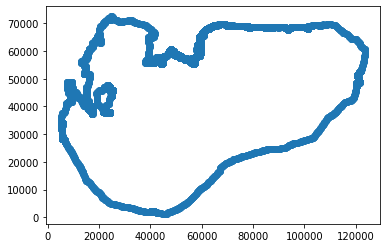

In [4]:
x = annotation_c[:,0]
y = annotation_c[:,1]
plt.scatter(x,y)

In [5]:
x_cut = []
y_cut = []
l = []

with open('Annotationen/Schnitt-D.obj') as obj:
    readlines = obj.readlines()
    
for line in readlines:
    if line.startswith('l '):
        lines = line.split(' ')
        if lines[1] not in l:
            l.append(int(lines[1]))
        if lines[2] not in l:
            l.append(int(lines[2]))
            
for index in l:
    splitted = readlines[index].split(' ')
    x_cut.append(float(splitted[3])-1)
    y_cut.append(float(splitted[1])-1)
    
        

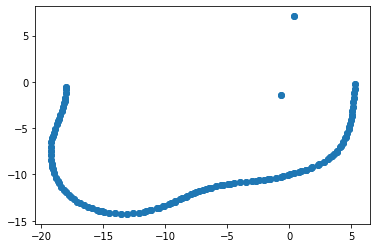

In [6]:
plt.scatter(x_cut, y_cut)

In [ ]:
# Vorregestrierung

# https://medium.com/@olga_kravchenko/generalized-procrustes-analysis-with-python-numpy-c571e8e8a421
# *gemeinsamen Nullpunkt finden
# *Abstände zum Nullpunkt normalisieren

# *Upsampling - # Interpolation für mehr Punkte

In [ ]:
# Point Drift Registrierung

In [ ]:
# Für Datei D, Rotation und Ausrichtung richtig. Für andere Dateien problematisch, Lösung suchen

In [ ]:
# Programm bereinigen, Abgabefertig machen